<a href="https://colab.research.google.com/github/marcebalzarelli/Proyecto-Individual-HENRY-N-1-Machine-Learning/blob/main/EDA%20/%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast
from scipy.stats import f_oneway

In [5]:
# ABRO DATAFRAME LIMPIO
ruta_archivo = '/content/drive/MyDrive/df_final_limpio.csv'
# Leo el archivo CSV y creo un DataFrame
df = pd.read_csv(ruta_archivo)

In [6]:
df.head(3)

,id,budget,genres,popularity,release_date,revenue,title,vote_average,vote_count,release_year,return,DiaSemana,Mes,cast,crew
0,862,30000000.0,"['Animation', 'Comedy', 'Family']",21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,1995,12.451801,Lunes,Octubre,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant..."
1,8844,65000000.0,"['Adventure', 'Fantasy', 'Family']",17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,1995,4.043035,Viernes,Diciembre,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam..."
2,15602,0.0,"['Romance', 'Comedy']",11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,1995,0.000000,Viernes,Diciembre,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark..."


In [7]:
df.describe()

,id,budget,popularity,revenue,vote_average,vote_count,release_year,return
count,42751.000000,4.275100e+04,42751.000000,4.275100e+04,42751.000000,42751.000000,42751.000000,4.275100e+04
mean,103664.641201,4.495324e+06,3.089545,1.192441e+07,5.680948,116.627073,1991.571753,7.005701e+02
std,110421.694958,1.793755e+07,6.153912,6.627656e+07,1.807067,505.884616,23.961268,7.695216e+04
min,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1878.000000,0.000000e+00
25%,25030.000000,0.000000e+00,0.462064,0.000000e+00,5.100000,4.000000,1977.000000,0.000000e+00
50%,56178.000000,0.000000e+00,1.246035,0.000000e+00,6.000000,11.000000,2001.000000,0.000000e+00
75%,143286.000000,0.000000e+00,4.068180,0.000000e+00,6.800000,38.000000,2010.000000,0.000000e+00
max,469172.000000,3.800000e+08,547.488298,2.787965e+09,10.000000,14075.000000,2020.000000,1.239638e+07


Histograma de presupuesto (budget):

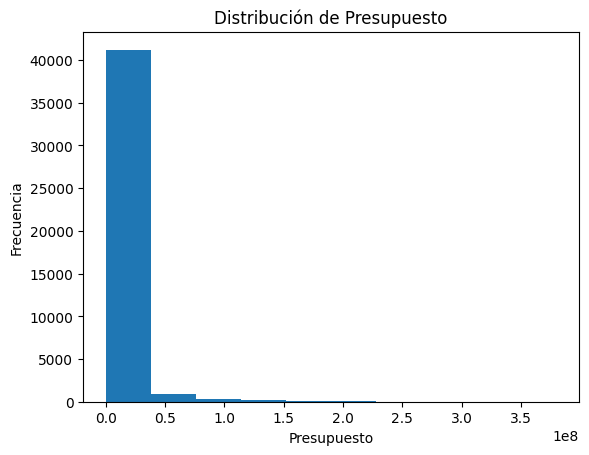

In [8]:
plt.hist(df['budget'], bins=10)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Presupuesto')
plt.show()

Gráfico de dispersión de popularidad y recaudación (popularity y revenue):

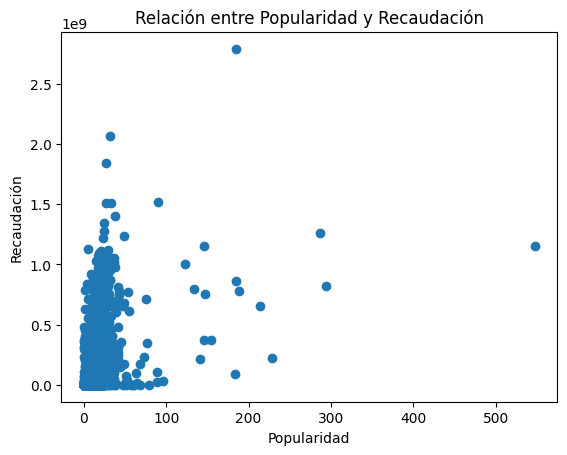

In [9]:
plt.scatter(df['popularity'], df['revenue'])
plt.xlabel('Popularidad')
plt.ylabel('Recaudación')
plt.title('Relación entre Popularidad y Recaudación')
plt.show()

Gráfico de dispersión budget y release year

Text(0.5, 1.0, 'Presupuesto vs Año de estreno')

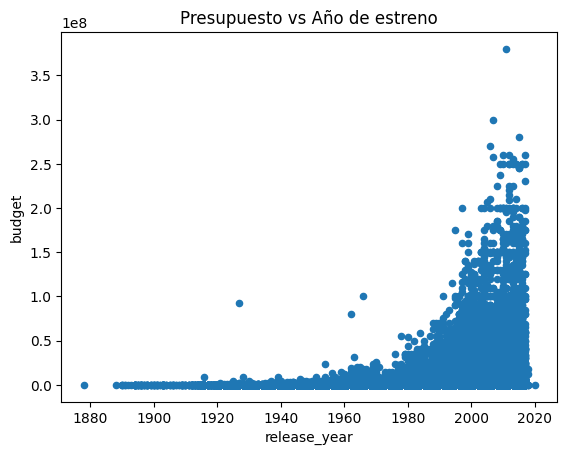

In [10]:
df.plot.scatter(y = 'budget', x = 'release_year')
plt.title('Presupuesto vs Año de estreno')

Producción de Peliculas por género

In [11]:
df.genres.value_counts()

['Drama']                                                    4927
['Comedy']                                                   3545
['Documentary']                                              1732
['Drama', 'Romance']                                         1295
['Comedy', 'Drama']                                          1130
                                                             ... 
['Adventure', 'Drama', 'Action', 'History', 'Romance']          1
['Fantasy', 'Drama', 'Foreign']                                 1
['Animation', 'Family', 'Adventure', 'Comedy', 'Fantasy']       1
['Adventure', 'Horror', 'Science Fiction', 'Thriller']          1
['Action', 'Mystery', 'Thriller', 'Horror']                     1
Name: genres, Length: 3995, dtype: int64

Lanzamiento de películas por año

In [12]:
df.release_year.value_counts()

2014    1798
2015    1766
2013    1752
2012    1576
2011    1548
        ... 
1888       1
1878       1
1892       1
1893       1
2020       1
Name: release_year, Length: 132, dtype: int64

Gráfico de dispersión de Presupuesto vs Recaudación

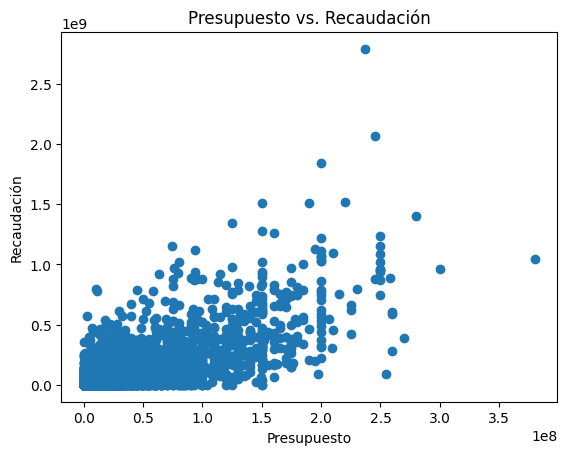

In [13]:
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Recaudación')
plt.title('Presupuesto vs. Recaudación')
plt.show()


Gráfico de dispersión de año de lanzamiento vs recaudación

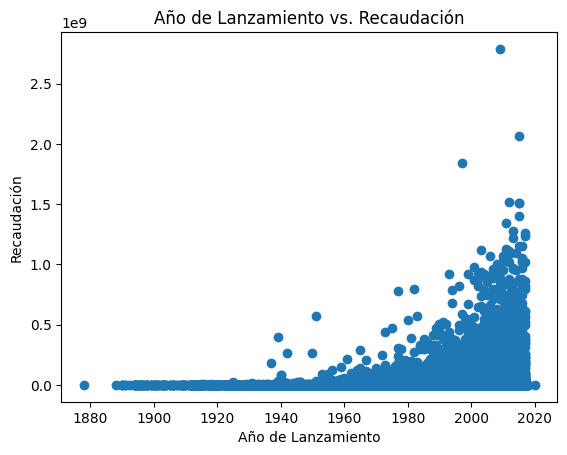

In [14]:
plt.scatter(df['release_year'], df['revenue'])
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Recaudación')
plt.title('Año de Lanzamiento vs. Recaudación')
plt.show()


Gráfico de dispersión de votos promedio vs recaudación

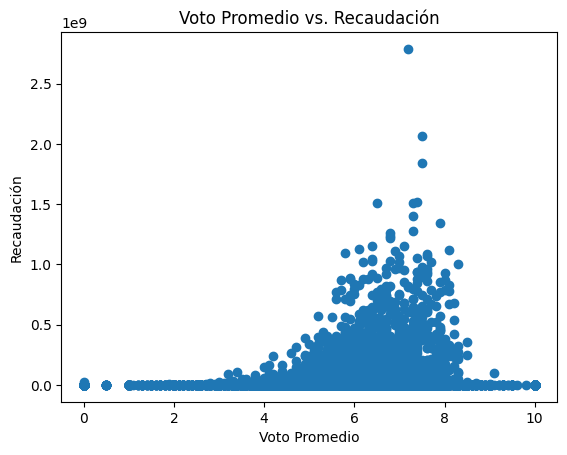

In [15]:
plt.scatter(df['vote_average'], df['revenue'])
plt.xlabel('Voto Promedio')
plt.ylabel('Recaudación')
plt.title('Voto Promedio vs. Recaudación')
plt.show()


Mapa de calor para Budget, Revenue, Runtime y Vote Average

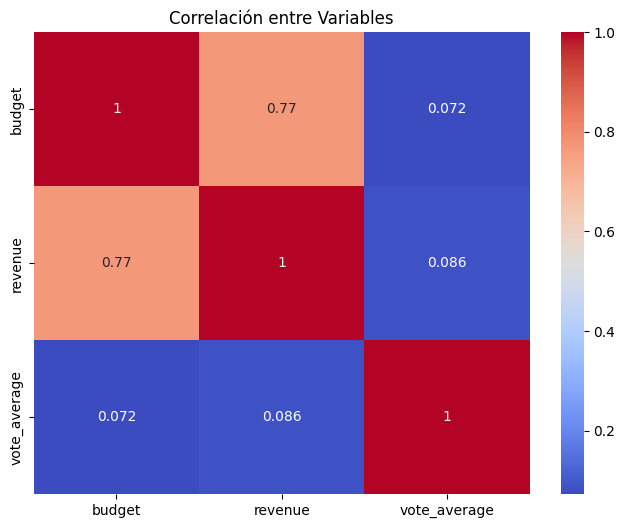

In [16]:

selected_vars = ['budget', 'revenue', 'vote_average']


selected_df = df[selected_vars]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()

Gráfico de caja de votos promedio

<Axes: >

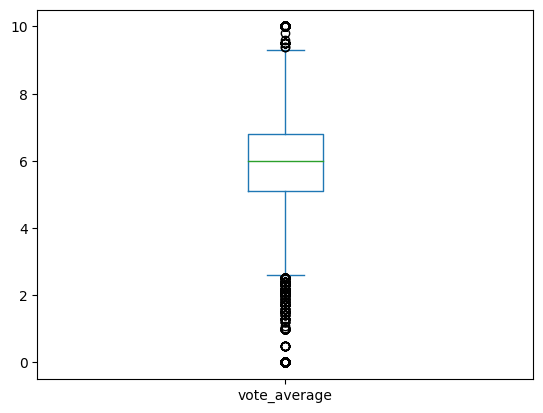

In [17]:
df.vote_average.plot.box()

Tabla de contingencia entre Género y Actores

In [18]:
tabla_contingencia = pd.crosstab(df["genres"], df["cast"])
print(tabla_contingencia)


cast                                                ["'Crazy' Tim Credeur", "Gil 'The Thrill' Guillory", "Dustin 'The Diamond' Poirier", 'Albert Stainback']  \
genres                                                                                                                                                         
['Action', 'Adventure', 'Animation', 'Comedy', ...                                                  0                                                          
['Action', 'Adventure', 'Animation', 'Comedy', ...                                                  0                                                          
['Action', 'Adventure', 'Animation', 'Comedy', ...                                                  0                                                          
['Action', 'Adventure', 'Animation', 'Comedy', ...                                                  0                                                          
['Action', 'Adventure', 'Animation', 'Co

Prueba de Independencia de Variables Cualitativas Chi Cuadrado

In [19]:
from scipy.stats import chi2_contingency

# Realizo el test de chi-cuadrado
chi2, p_valor, _, _ = chi2_contingency(tabla_contingencia)
print("Estadístico de chi-cuadrado:", chi2)
print("Valor p:", p_valor)


Estadístico de chi-cuadrado: 163958572.30311528
Valor p: 0.0


Al tener un valor p tan pequeño, puedo decir que existe una relación significativa entre las variables género y actor